<a href="https://colab.research.google.com/github/tomyrso/mat281_portfolio/blob/master/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06



<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [3]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



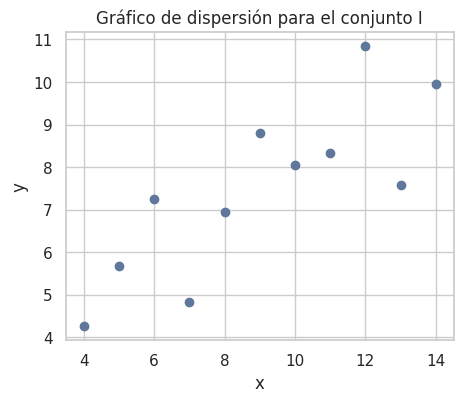

--------------------


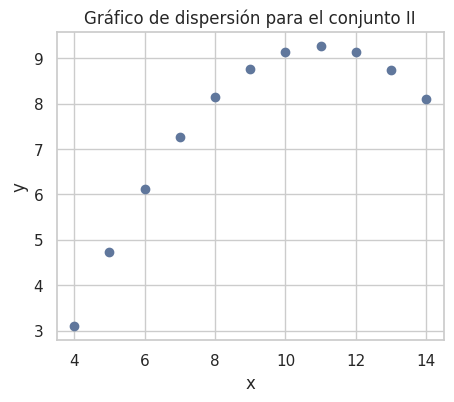

--------------------


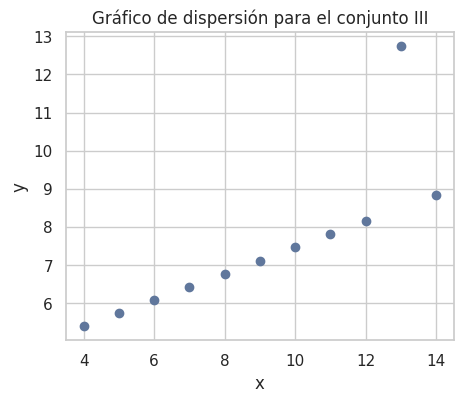

--------------------


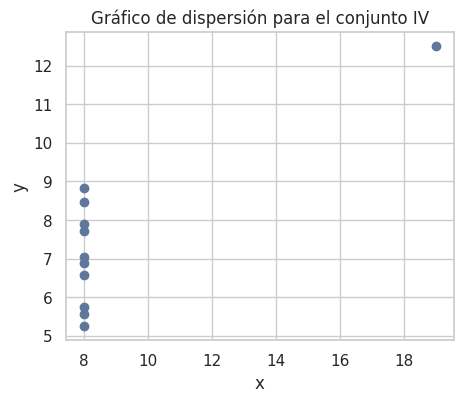

--------------------


In [8]:
for dataset in data.dataset.unique():
  subset = data[data.dataset == dataset]
  plt.figure(figsize=(5, 4))  # Crear una nueva figura para cada gráfico
  plt.scatter(subset.x, subset.y)
  plt.title(f"Gráfico de dispersión para el conjunto {dataset}")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()
  print("--------------------")

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [23]:
# Creamos nuevos dataframes para cada dato, donde generamos una descriçión estadistica.
lista = []

for dataset in data.dataset.unique():
  subset = data[data.dataset == dataset]
  aux = subset.describe()
  aux.columns=['X-'+dataset, 'Y-'+dataset]
  lista.append(aux)

lista = pd.concat(lista, axis=1)
lista




,X-I,Y-I,X-II,Y-II,X-III,Y-III,X-IV,Y-IV
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



Dataset I
MSE: 1.565385421785951
R^2: 0.6665424595087748


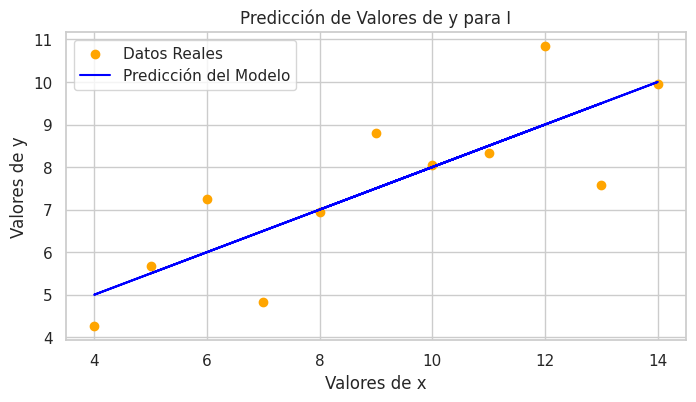

Dataset II
MSE: 1.5684809191066185
R^2: 0.6662420337274844


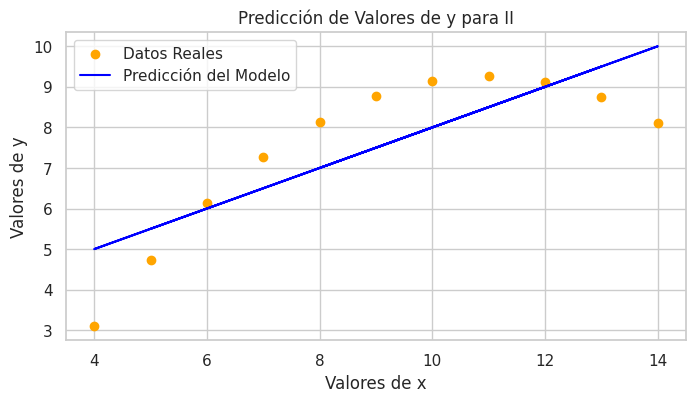

Dataset III
MSE: 1.5639075482529954
R^2: 0.6663240410665592


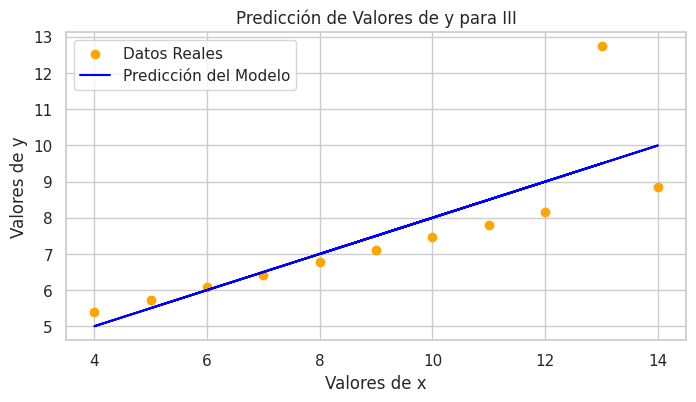

Dataset IV
MSE: 1.5607936479347113
R^2: 0.6667072568984653


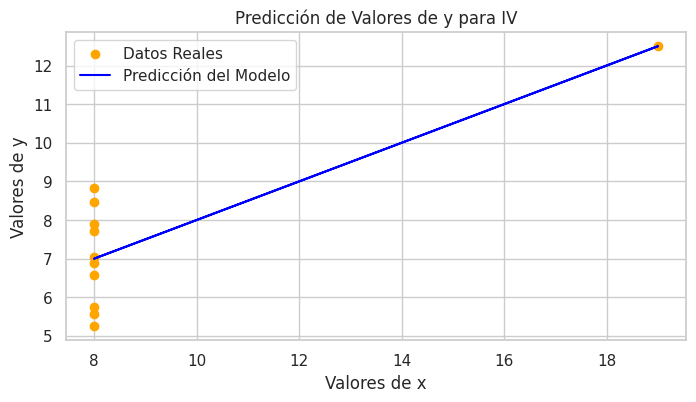

In [30]:
# Regresión lineal
model = LinearRegression(fit_intercept=True)
datasets = data.dataset.unique()

# Inicializamos un ciclo para iterar sobre los datasets
for dataset in datasets:
    # Filtrar los datos para el dataset actual
    subset = data[data.dataset == dataset]

    # Separar los ejes
    xI = subset[['x']].copy()  # Como DataFrame
    yI = subset['y'].copy()    # Como Serie

    # Aplicar el modelo a los datos
    model.fit(xI, yI)

    # Crear un conjunto de nuevos valores de x
    xfit = xI.copy()

    # Predecir los valores de y utilizando el modelo
    yfit = model.predict(xfit)

    # Crear figura para los gráficos
    plt.figure(figsize=(8, 4))
    plt.scatter(xI, yI, label='Datos Reales', color='orange')
    plt.plot(xfit, yfit, label='Predicción del Modelo', color='blue')

    # Etiquetas y título
    plt.xlabel('Valores de x')
    plt.ylabel('Valores de y')
    plt.title(f'Predicción de Valores de y para {dataset}')
    plt.legend()

    # Calcular error cuadrático medio y R^2
    mse = mean_squared_error(yI, yfit)**2
    r2 = r2_score(yI, yfit)

    # Mostrar resultados de métricas
    print(f"Dataset {dataset}")
    print(f"MSE: {mse}")
    print(f"R^2: {r2}")

    # Mostrar el gráfico
    plt.show()


4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

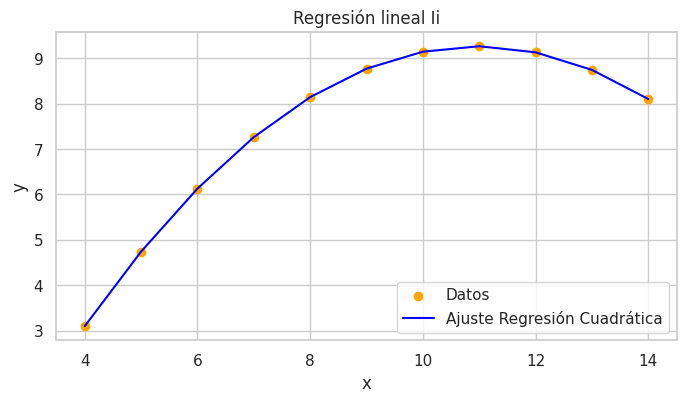

MSE: 4.138495729542357e-12
R^2: 0.9999994578574282


In [27]:
from sklearn.preprocessing import PolynomialFeatures
group_2 = data[data['dataset'] == 'II']

X = group_2['x'].values.reshape(-1, 1)
y = group_2['y'].values

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


modelo = LinearRegression()

# Ajustar el modelo a los datos polinómicos
modelo.fit(X_poly, y)

# Hacer predicciones
y_pred = modelo.predict(X_poly)

# Graficar los puntos originales y la curva de regresión cuadrática
plt.figure(figsize=(8, 4))
plt.scatter(group_2['x'], group_2['y'], color='orange', label='Datos')
sns.lineplot(x=group_2['x'], y=y_pred, color='blue', label='Ajuste Regresión Cuadrática')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión lineal Ii')
plt.legend()
plt.show()


mse = mean_squared_error(y_pred, group_2['y'])**2
r2 = r2_score(y_pred, group_2['y'])
print(f"MSE: {mse}")
print(f"R^2: {r2}")


Se utiliza una regresion cuadratica en vez de lineal, la cual claramente se adapta mucho mejor a la curva que descrinben los puntos.

MSE: 5.7720526227008334e-11^2
R^2: 0.999993107581533


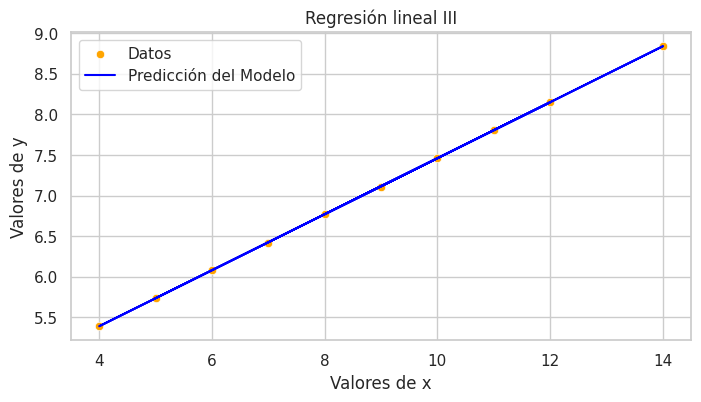

In [33]:
group_3 = data[data['dataset'] == 'III']
#Se quita el outlier
group_3_fixed=group_3.drop(group_3['y'].idxmax())

# Generamos nuevamente la regresión lineal.
# Separamos los ejes
x = group_3_fixed[['x']].copy() # como dataframe
y = group_3_fixed['y'].copy() # como series
# Aplicar modelo a los datos
model.fit(x, y)
# Crear un conjunto de nuevos valores de x con etiquetas (y) desconocidas
xfit = x.copy()

# Predecir los valores de y utilizando el modelo
yfit = model.predict(xfit)

plt.figure(figsize=(8, 4))
sns.scatterplot(x=group_3_fixed['x'],y=group_3_fixed['y'],color='orange',label='Datos')
plt.plot(xfit,yfit,label='Predicción del Modelo',color='blue')
plt.xlabel('Valores de x')
plt.ylabel('Valores de y')
plt.title('Regresión lineal III')
plt.legend()


mse = mean_squared_error(y, yfit)**2
r2 = r2_score(y, yfit)
print(f"MSE: {mse}^2")
print(f"R^2: {r2}")
# Mostramos el gráfico


Se elimino el punto Outlier y la regresion lineal se ajusta muy bien.

MSE: 0.0
R^2: 1.0


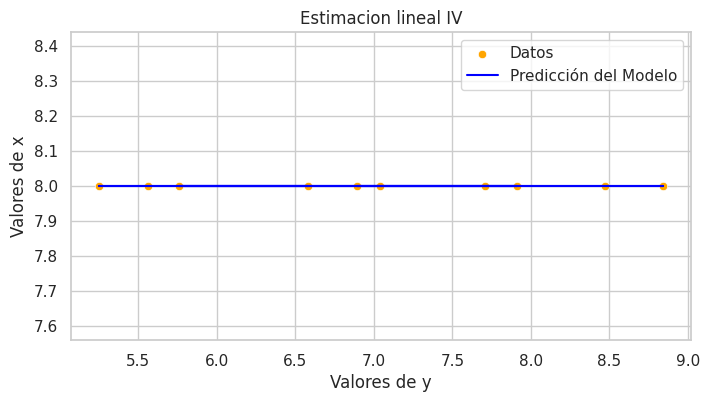

In [32]:
group_4 = data[data['dataset'] == 'IV']
# Vamos a eliminar el punto atípico
group_4_fixed=group_4.drop(group_4['y'].idxmax())
# Separamos los ejes intercambiando el x con y, continuaremos el proceso
x = group_4_fixed[['y']].copy() # como dataframe
y = group_4_fixed['x'].copy() # como series
# Aplicar modelo a los datos
model.fit(x, y)
# Crear un conjunto de nuevos valores de x con etiquetas (y) desconocidas
xfit = x.copy()
# Predecir los valores de y utilizando el modelo
yfit = model.predict(xfit)
# Graficamos los ejes cambiados y la regresión para dichos ejes
plt.figure(figsize=(8, 4))
sns.scatterplot(x=group_4_fixed['y'], y=group_4_fixed['x'],color='orange',label='Datos')
plt.plot(xfit,yfit,label='Predicción del Modelo',color='blue')  # Línea de predicción
plt.xlabel('Valores de y')  # Etiqueta del eje x
plt.ylabel('Valores de x')  # Etiqueta del eje y
plt.title('Estimacion lineal IV')  # Título de la gráfica
plt.legend()  # Mostrar leyenda


mse = mean_squared_error(y, yfit)**2
r2 = r2_score(y, yfit)
print(f"MSE: {mse}")
print(f"R^2: {r2}")


Eliminamos el punto que estaba mas lejano, intercambiamos los valores de los ejes y se obtine una estimacion excelente en x=8
